# Atividade 2.1 - Redes Neurais Artificiais

### **Membros da Equipe**:
1. Arthur Uguen Mendonça (2115310028)
2. Julio Cesar Ferreira De Souza (2115310015)
3. Lucas Cruz Araújo (2115310019)
4. Melinne Diniz de Oliveira (2115310021)

## Parte I – Resolvendo um Problema Linearmente Separável

Consideraremos o arquivo dataAll.txt

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing, metrics
from google.colab import files

\begin{array}{cl}
1, & se \ u \geq \vartheta \\
0, & se \ x < \vartheta 
\end{array}

In [2]:
class Perceptron:

    def __init__(self, name, instances, bias, learning_rate, weight_interval):
        self.bias = bias
        self.name = name
        self.show_info = True
        self.learning_rate = learning_rate
        self.weight_interval = weight_interval
        self.epochs = np.array([])
        self.instances = instances
        with open(self.name, 'rb') as f:
            b = f.read()
        self.input = np.ndarray(shape=(self.instances, 1, 3),
                                dtype=float, buffer=np.array(b))
        self.input = self.add_bias(self.input, self.bias, self.instances)
        self.weights = None
        self.adjust = []

        

    # 'dataAll.txt'

    def init_input(self):
       pass
    def activation_func(self, x):
        if (x < 0):
            return 0
        return 1

    def apply_weights(self, current_weight, input_vector) -> float:
        sum = 0
        for i in range(0, len(input_vector)):
            sum += current_weight[i] * input_vector[i]

        sum = float(f"{sum:.4f}")

        return sum

    def update_weights(self, current_weight, learning_rate, error, input):

        new_weight = np.sum(
            [current_weight, (learning_rate * error * input)], axis=0)

        if np.array_equal(new_weight, current_weight):
            change = False
        else:
            change = True

        return new_weight, change

    def add_bias(self, input, bias, size):
        array = np.array([])
        for i in range(len(self.input)):
            array = np.append(array, self.bias)
            array = np.append(array, self.input[i])
        array = array.reshape((size, 1, 4))
        return array

    def train_perceptron(self):

        # Lista com os diferentes pesos ao longo da execução
        weights_list = np.array([])
        weights = np.random.uniform(self.weight_interval[0], self.weight_interval[1], 3)
        #weights = np.random.uniform(-0.5, 0.5, 3)  # Pesos iniciais aleatórios
        weights_list = np.append(weights_list, weights)
        print(weights)

        is_convergent = False  # Condição de para se não ouver mudança de pesos ao longo da época
        epochs = 0

        c = 0
        while not (is_convergent):

            change_weight = False
            change = False  # a princípio, não houve mudança de pesos

            # Executa uma época (aplicar para todas as instâncias do conjunto de treino)
            # incrementa o numero de épocas
            epochs = epochs + 1
            for i in self.input:
                # Entradas incluindo o viés
                input_vector = np.array([i[0][0], i[0][1], i[0][2]])
                real = i[0][3]  # ground truth

                # Aplica os pesos às entradas
                sum = self.apply_weights(weights, input_vector)
                estimated = self.activation_func(sum)  # valor estimado

                error = real - estimated

                # Função de atualização de pesos:
                #   - Retorna os novos pesos (pode ser que não mude)
                #   - Retorna True se houve mudança
                weights, change_weight = self.update_weights(
                    weights, self.learning_rate, error, input_vector)

                if (change_weight):  # se houve mudança de pesos
                    # adiciona 1 na quantidade de ajusres
                    # Salva os novos pesos
                    weights_list = np.append(weights_list, weights)
                    change = True

            # Se não houve mundança de pesos na época, finaliza o looping
            if not (change):
                is_convergent = True
        if self.show_info:
          print(f"Weight adjustment: {len(weights_list) - 1}")
          self.adjust.append(len(weights_list) - 1)
          print(f"Total Epochs: {epochs}")

        self.epochs = np.append(self.epochs, epochs)
        self.weights = weights
        return weights

    def plot_results(self):
        # Pesos ideais encontrados após o treino
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        x_training1 = self.input[:, 0, 1]
        x_training2 = self.input[:, 0, 2]
        y_training = self.input[:, 0, 3]

        # Coeficiente linear e angular da reta linearmente separável
        linear_coefficient = w0/w2
        angular_coefficient = w1/w2

        x_line = np.linspace(-1000,1000,800)
        y_line = linear_coefficient-angular_coefficient*x_line

        color = ['red' if value == 1 else 'blue' for value in y_training]

        plt.scatter(x_training1, x_training2, marker='o', color=color)
        plt.plot(x_line, y_line, "-", color='black')
        plt.xlabel('X1 input feature')
        plt.ylabel('X2 input feature')
        plt.title('Perceptron regression for x1, x2')
        plt.show()

In [4]:
perceptron = Perceptron(name='dataAll.txt', instances=800, bias=-1, learning_rate=0.1, weight_interval=[-0.5, 0.5])

weights = perceptron.train_perceptron()

[-0.26990273  0.03718089  0.1941602 ]
Weight adjustment: 230
Total Epochs: 5


### Gráfico de com exemplos do conjunto de dados e reta que os separa 

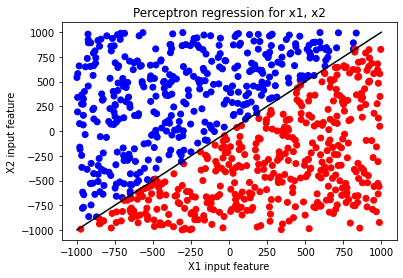

In [5]:
perceptron.plot_results()

## Parte II – Experimentação


**Identificando o exemplo a ser utilizado:**

Somando os últimos dígitos da cada matrícula obtivemos o resultado

8 + 5 + 9 + 1 = 23

E o resto da divisão de 23 por 4 é igual a 3.

Resultando no _**Exemplo 3 (data3.txt)**_  o qual será utilizado nesta parte da atividade.


In [7]:
from prettytable import PrettyTable
import statistics

Separando as 6 configurações:

In [ ]:
n = [0.4, 0.1, 0.001]
weights = [(-100, 100), (-0.5, 0.5)]
means = []
standard_deviations = []
min_epoch = []

combination = list()
for rate in n:
  for w in weights:
    combination.append([rate, w])

In [8]:
perceptron = Perceptron('data3.txt', instances=500, bias=-1, learning_rate=0.1, weight_interval=[-0.5, 0.5])

for config in range(len(combination)):
  # Cada configuração é atribuida aos parametros correspondentes na classe Perceptron
  print(f"============= {config + 1}. CONFIGURAÇÃO: {combination[config]} ===============")
  perceptron.learning_rate = combination[config][0]
  perceptron.weight_interval = combination[config][1]
  for i in range(0, 10):
    print(f'--------REPETIÇÃO {i+1}---------')
    perceptron.train_perceptron()
  means.append(statistics.mean(perceptron.adjust))
  standard_deviations.append(statistics.stdev(perceptron.adjust))
  min_epoch.append(np.amin(perceptron.epochs))
  perceptron.epochs = np.empty([]) #limpa a lista de épocas
  perceptron.adjust = [] # limpa a lista de ajustes

============= 1. CONFIGURAÇÃO: [0.4, (-100, 100)] ===============
--------REPETIÇÃO 1---------
[-93.26668227  38.70022826  31.52602641]
Weight adjustment: 776
Total Epochs: 6
--------REPETIÇÃO 2---------
[-19.66892354 -92.01274914 -22.87978957]
Weight adjustment: 1559
Total Epochs: 8
--------REPETIÇÃO 3---------
[-80.61077662  20.42141841  25.49622716]
Weight adjustment: 653
Total Epochs: 4
--------REPETIÇÃO 4---------
[-26.13024235 -10.67821102 -35.81954265]
Weight adjustment: 758
Total Epochs: 10
--------REPETIÇÃO 5---------
[-69.98840883  65.65017896  42.2282677 ]
Weight adjustment: 731
Total Epochs: 11
--------REPETIÇÃO 6---------
[-74.09486159  94.27518747  48.31028636]
Weight adjustment: 803
Total Epochs: 16
--------REPETIÇÃO 7---------
[56.15227919 21.88801181 78.32846371]
Weight adjustment: 749
Total Epochs: 16
--------REPETIÇÃO 8---------
[-83.52817551  17.21338768 -98.58430816]
Weight adjustment: 1691
Total Epochs: 24
--------REPETIÇÃO 9---------
[-45.30813743  13.51917419  8

In [10]:
table = PrettyTable()

qtde_ajustes = [means, standard_deviations]

table.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Quantidade de Ajustes", "Menor número de épocas p/ convergência"]

table.add_row([n[0], weights[0], f"{means[0]:.2f} +/- {standard_deviations[0]:.2f}", min_epoch[0]])
table.add_row([n[0], weights[1], f"{means[1]:.2f} +/- {standard_deviations[1]:.2f}", min_epoch[1]])
table.add_row([n[1], weights[0], f"{means[2]:.2f} +/- {standard_deviations[2]:.2f}", min_epoch[2]])
table.add_row([n[1], weights[1], f"{means[3]:.2f} +/- {standard_deviations[3]:.2f}", min_epoch[3]])
table.add_row([n[2], weights[0], f"{means[4]:.2f} +/- {standard_deviations[4]:.2f}", min_epoch[4]])
table.add_row([n[2], weights[1], f"{means[5]:.2f} +/- {standard_deviations[5]:.2f}", min_epoch[5]])

print(table)

+---------------------+--------------------+-------------------------+----------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos |  Quantidade de Ajustes  | Menor número de épocas p/ convergência |
+---------------------+--------------------+-------------------------+----------------------------------------+
|         0.4         |    (-100, 100)     |    961.40 +/- 367.77    |                  4.0                   |
|         0.4         |    (-0.5, 0.5)     |     26.00 +/- 13.04     |                  3.0                   |
|         0.1         |    (-100, 100)     |   4136.60 +/- 1458.55   |                  3.0                   |
|         0.1         |    (-0.5, 0.5)     |     29.60 +/- 19.43     |                  2.0                   |
|        0.001        |    (-100, 100)     | 391214.90 +/- 260444.79 |                  2.0                   |
|        0.001        |    (-0.5, 0.5)     |    2028.80 +/- 751.27   |                  2.0             

_**Análise dos resultados:**_

A partir da distribuição na tabela é possível perceber alguns padrões. Primeiramente, em determinado momento nossa implementação do perceptron consegue chegar a convergência com um número bem pequeno de épocas. No entanto, ao olharmos para a coluna com a quantidade de ajustes feitas, vemos que essas mesmas configurações possuem valores altíssimos nesse quesito. Isso significa que a média de ajustes até chegar a convergência é um valor muito alto e o desvio padrão comprova que existem pesos que treinaram fazendo poucos ajustes, porém outros em muito maiores. A taxa de aprendizado com valor 𝟎.𝟎𝟎𝟏, por exemplo, nos dois intervalos realizou uma quantidade significativa de ajustes.

Podemos observar também que as configurações em que foi preciso maior quantidade de ajustes foram as que possuem o intervalo maior, para todos os valores de taxa de aprendizado, indicando que nesse caso um intervalo de pesos maior dificulta a comvergência do modelo.

Logo, apesar de todas as configurações possuírem algum treino com somente uma época, levando em conta os pontos observados podemos concluir que as configurações que se saem melhor são as que possuem menor intervalo de pesos e taxa de aprendizado entre 0.1 e 0.4.

## Parte III – Validação Holdout em Problema Não-Linearmente Separável

Consideraremos o arquivo dataHoldout.txt

In [ ]:
!pip install seaborn
!pip install metrics

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing, metrics
import seaborn as sn

class Perceptron2:

    def __init__(self, data, instances, bias, learning_rate, weight_interval):
        self.bias = bias
        self.show_info = True
        self.learning_rate = learning_rate
        self.weight_interval = weight_interval
        self.epochs = np.array([])
        self.instances = instances
        self.input = np.ndarray(shape=(self.instances, 1, 3),
                                dtype=float, buffer=data)
        self.input = self.add_bias(self.input, self.bias, self.instances)
        self.best_weight = None

    def init_input(self):
       pass
    def activation_func(self, x):
        if (x < 0):
            return 0
        return 1

    def apply_weights(self, current_weight, input_vector) -> float:
        sum = 0
        for i in range(0, len(input_vector)):
            sum += current_weight[i] * input_vector[i]

        sum = float(f"{sum:.4f}")

        return sum

    def update_weights(self, current_weight, learning_rate, error, input):

        new_weight = np.sum(
            [current_weight, (learning_rate * error * input)], axis=0)

        if np.array_equal(new_weight, current_weight):
            change = False
        else:
            change = True

        return new_weight, change

    def add_bias(self, input, bias, size):
        array = np.array([])
        for i in range(len(input)):
            array = np.append(array, bias)
            array = np.append(array, input[i])
        array = array.reshape((size, 1, 4))
        return array

    def test(self, datatest, instances, weights):
      # Lista com os diferentes pesos ao longo da execução
        datatest = self.add_bias(datatest, self.bias, instances)
        list_estimated = []
        for i in datatest:
            # Entradas incluindo o viés
            input_vector = np.array([i[0][0], i[0][1], i[0][2]])
            real = i[0][3]  # ground truth

            # Aplica os pesos às entradas
            sum = self.apply_weights(weights, input_vector)
            estimated = self.activation_func(sum)  # valor estimado
            list_estimated.append(estimated)
        return list_estimated

    def train_perceptron(self):

        # Lista com os diferentes pesos ao longo da execução
        weights_list = np.array([])
        weights = np.random.uniform(self.weight_interval[0], self.weight_interval[1], 3)
        #weights = np.random.uniform(-0.5, 0.5, 3)  # Pesos iniciais aleatórios
        weights_list = np.append(weights_list, weights)
        print(weights)

        is_convergent = False  # Condição de para se não ouver mudança de pesos ao longo da época
        epochs = 0
        while not (is_convergent):
            if(epochs == 100):
              break

            change_weight = False
            change = False  # a princípio, não houve mudança de pesos

            # Executa uma época (aplicar para todas as instâncias do conjunto de treino)
            # incrementa o numero de épocas
            epochs = epochs + 1
            # Randomiza o array de treinamento
            np.random.shuffle(self.input)
            for i in self.input:
                # Entradas incluindo o viés
                input_vector = np.array([i[0][0], i[0][1], i[0][2]])
                real = i[0][3]  # ground truth

                # Aplica os pesos às entradas
                sum = self.apply_weights(weights, input_vector)
                estimated = self.activation_func(sum)  # valor estimado

                error = real - estimated

                # Função de atualização de pesos:
                #   - Retorna os novos pesos (pode ser que não mude)
                #   - Retorna True se houve mudança
                weights, change_weight = self.update_weights(
                    weights, self.learning_rate, error, input_vector)

                if (change_weight):  # se houve mudança de pesos

                    # Salva os novos pesos
                    weights_list = np.append(weights_list, weights)
                    change = True

            # Se não houve mundança de pesos na época, finaliza o looping
            if not (change):
                is_convergent = True
        if self.show_info:
          print(f"Weight adjustment: {len(weights_list) - 1}")
          print(f"Total Epochs: {epochs}")

        self.epochs = np.append(self.epochs, epochs)
        self.best_wights = weights
        return weights

    def plot_results(self):
        # Pesos ideais encontrados após o treino
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        x_training1 = self.input[:, 0, 1]
        x_training2 = self.input[:, 0, 2]
        y_training = self.input[:, 0, 3]

        # Coeficiente linear e angular da reta linearmente separável
        linear_coefficient = w0/w2
        angular_coefficient = w1/w2

        x_line = np.linspace(-1000,1000,800)
        y_line = linear_coefficient-angular_coefficient*x_line

        color = ['red' if value == 1 else 'blue' for value in y_training]

        plt.scatter(x_training1, x_training2, marker='o', color=color)
        plt.plot(x_line, y_line, "-", color='black')
        plt.xlabel('X1 input feature')
        plt.ylabel('X2 input feature')
        plt.title('Perceptron regression for x1, x2')
        plt.show()

In [25]:
import random

with open('dataHoldout.txt', 'rb') as f:
    b = f.read()
data_holdout = np.ndarray(shape=(800,1,3),dtype=float, buffer=np.array(b))


def train_test_split(arr, holdout_ratio=0.6):
    random.shuffle(arr)
    split_index = int(len(arr) * (1-holdout_ratio))
    train_set = arr[:split_index]
    test_set = arr[split_index:]
    return train_set, test_set


train_set, test_set = train_test_split(data_holdout, holdout_ratio=0.4)

In [29]:
indice_maximo = 800
perceptron = Perceptron2(data=train_set, instances=int(0.6 * indice_maximo), bias=-1, learning_rate=0.1, weight_interval=[-5, 5])
result = perceptron.train_perceptron()

predicts = np.array(perceptron.test(test_set, int(0.4 * indice_maximo), result))

[ 3.27943727 -3.81696336  0.88353089]
Weight adjustment: 3530
Total Epochs: 100


### 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

[[173  36]
 [  1 110]]


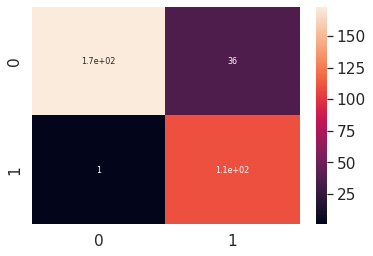

In [30]:
y_test = test_set[:,0, 2]
cm = metrics.confusion_matrix(y_test, predicts)
print(cm)
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 8})

### 2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

In [31]:
# Acurácia
print(f'Acurácia: {metrics.accuracy_score(y_test, predicts)}')

Acurácia: 0.884375


### 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;

In [32]:
# Precisão
print(
    f"Precisão: {metrics.precision_score(y_test, predicts, average='macro')}")

#Revocação
print(
    f"Revocação: {metrics.recall_score(y_test, predicts, average='macro')}")
    
#F1
print(f"F_1 score: {metrics.f1_score(y_test, predicts, average='macro')}")

Precisão: 0.8738387655487325
Revocação: 0.9093710935816199
F_1 score: 0.8797126921396714


### 4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

Com base nas métricas de Acurácia, Precisão, Revocação e F_1 score, nota-se claramente que o modelo, apesar de ter atingido uma nota relativamente boa em todas as métricas, possui limitações claras. Isso se deve ao fato de o problema não ser lineramente separável, ou seja, o modelo Perceptron de Rosenblatt implementado não é capaz de descrever uma solução que abranja todas as eventuais instâncias.
Durante a própria elaboração do Perceptron, foi necessário estabelecer uma quantidade limite de épocas que ele iria possuir em sua execução. Logo, não ia possuir condições de atingir a solução plena do problema. 